LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.69      0.74      0.72     35021
          1       0.72      0.67      0.69     34979

avg / total       0.71      0.71      0.71     70000

0.591390175731
0.706571428571


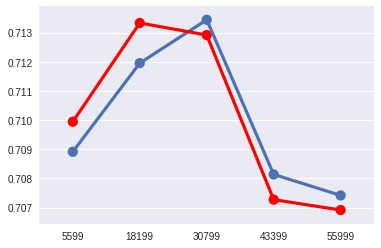

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       0.68      0.70      0.69     35021
          1       0.69      0.67      0.68     34979

avg / total       0.68      0.68      0.68     70000

2.2267385661
0.683314285714


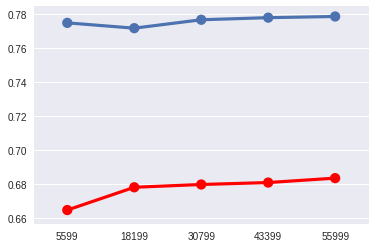

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')
             precision    recall  f1-score   support

          0       0.67      0.70      0.69     35021
          1       0.69      0.66      0.67     34979

avg / total       0.68      0.68      0.68     70000

2.24556591337
0.680214285714


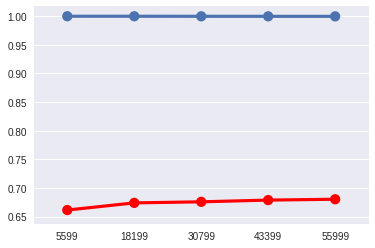

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.67      0.73      0.70     35021
          1       0.70      0.65      0.67     34979

avg / total       0.69      0.69      0.69     70000

1.70105143151
0.687285714286


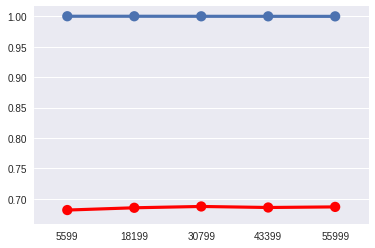

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

          0       0.68      0.75      0.71     35021
          1       0.72      0.65      0.69     34979

avg / total       0.70      0.70      0.70     70000

1.4676316834
0.699957142857


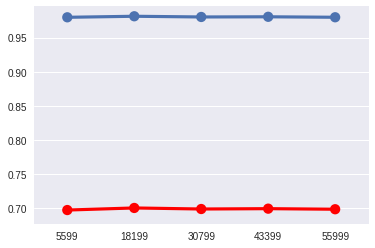

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
            cv=5, method='sigmoid')
             precision    recall  f1-score   support

          0       0.71      0.73      0.72     35021
          1       0.72      0.70      0.71     34979

avg / total       0.72      0.72      0.72     70000

0.571851277404
0.716414285714


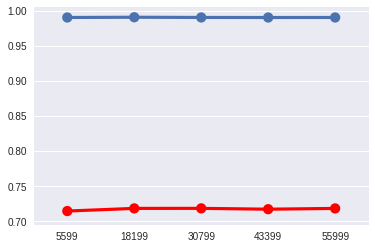

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
             precision    recall  f1-score   support

          0       0.67      0.56      0.61     35021
          1       0.62      0.73      0.67     34979

avg / total       0.65      0.64      0.64     70000

4.97305228166
0.641271428571


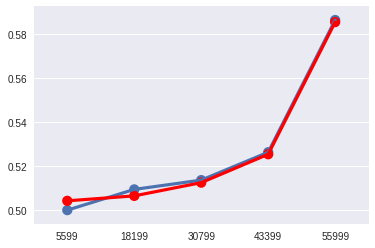

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
             precision    recall  f1-score   support

          0       0.72      0.77      0.75     35021
          1       0.75      0.70      0.73     34979

avg / total       0.74      0.74      0.74     70000

0.539702569962
0.735514285714


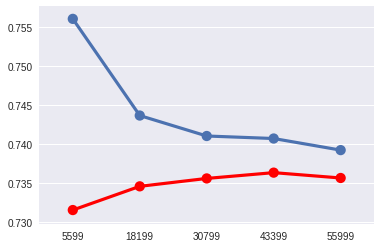

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
             precision    recall  f1-score   support

          0       0.72      0.78      0.75     35021
          1       0.76      0.70      0.73     34979

avg / total       0.74      0.74      0.74     70000

0.539578768915
0.736571428571


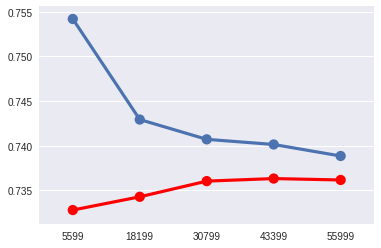

LGBMClassifier(boosting_type='gbdt', colsample_bytree=1, drop_rate=0.1,
        is_unbalance=False, learning_rate=0.1, max_bin=255, max_depth=-1,
        max_drop=50, min_child_samples=10, min_child_weight=5,
        min_split_gain=0, n_estimators=10, nthread=-1, num_leaves=31,
        objective='binary', reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
        seed=0, sigmoid=1.0, silent=True, skip_drop=0.5, subsample=1,
        subsample_for_bin=50000, subsample_freq=1, uniform_drop=False,
        xgboost_dart_mode=False)
             precision    recall  f1-score   support

          0       0.71      0.78      0.75     35021
          1       0.76      0.69      0.72     34979

avg / total       0.74      0.73      0.73     70000

0.566990301506
0.733814285714


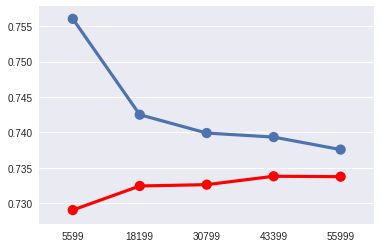

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')
             precision    recall  f1-score   support

          0       0.63      0.63      0.63     35021
          1       0.63      0.63      0.63     34979

avg / total       0.63      0.63      0.63     70000

12.7346052904
0.630414285714


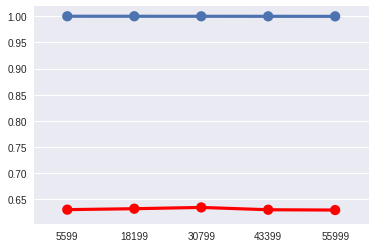

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

          0       0.63      0.63      0.63     35021
          1       0.63      0.63      0.63     34979

avg / total       0.63      0.63      0.63     70000

12.6408769873
0.633471428571


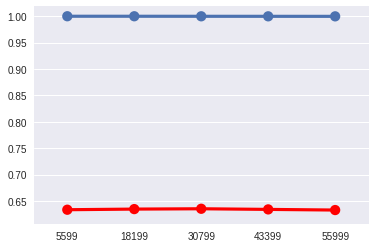

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
             precision    recall  f1-score   support

          0       0.70      0.80      0.75     35021
          1       0.77      0.66      0.71     34979

avg / total       0.73      0.73      0.73     70000

0.686924684492
0.729871428571


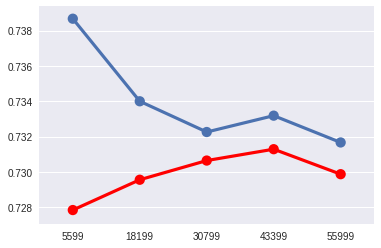

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.68      0.74      0.71     35021
          1       0.71      0.65      0.68     34979

avg / total       0.70      0.69      0.69     70000

1.4878597009
0.693371428571


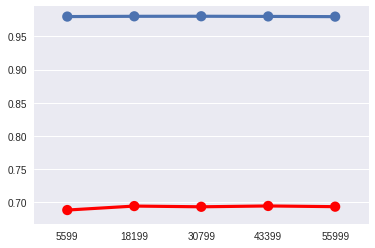

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np

train = pd.read_csv('./train.csv', sep=';')
test = pd.read_csv('./test.csv', sep=';')
answer = train.cardio

complete = pd.concat([train, test])
complete = complete.drop(['id', 'cardio'], axis=1)
complete.loc[complete['active'] == 'None', 'active'] = np.NaN
complete.loc[complete['alco'] == 'None', 'alco'] = np.NaN
complete.loc[complete['smoke'] == 'None', 'smoke'] = np.NaN
complete['active'] = complete['active'].astype('float')
complete['alco'] = complete['alco'].astype('float')
complete['smoke'] = complete['smoke'].astype('float')

train = complete.head(len(train))
test = complete.tail(len(test))

%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.mixture import BayesianGaussianMixture, DPGMM, GMM, GaussianMixture, VBGMM
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from xgboost.sklearn import XGBClassifier
from lightgbm.sklearn import LGBMClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

models = [
    LogisticRegression(),
    KNeighborsClassifier(), 
    KNeighborsClassifier(weights='distance'),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    CalibratedClassifierCV(RandomForestClassifier(), cv=5),
    MLPClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    ExtraTreeClassifier(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier()
    # SGDClassifier(loss='modified_huber', warm_start=True), # Explodes weirdly
    # LinearDiscriminantAnalysis(), too long
    # QuadraticDiscriminantAnalysis(), too long
    # BernoulliNB(), too long
    # GaussianNB(), too long
    # NuSVC(probability=True), too long
    # SVC(probability=True), too long
    # LabelPropagation(), too long
    # LabelSpreading(), too long
    # BayesianGaussianMixture(), explodes
    # DPGMM(), explodes
    # GMM(), explodes
    # GaussianProcessClassifier(), explodes

    # GaussianMixture(), explodes
]

for model in models:
    proba_predictions = cross_val_predict(model, train, answer, cv=5, method='predict_proba')
    predictions = cross_val_predict(model, train, answer, cv=5)
    print model
    print classification_report(answer, predictions)
    print log_loss(answer, proba_predictions)
    print accuracy_score(answer, predictions)

    train_sizes, train_scores, test_scores = learning_curve(model, train, answer, cv=5)

    plt.figure()
    
    data = { 'x': train_sizes, 'y': map(lambda x: np.mean(x), train_scores) }
    sns.pointplot(x='x', y='y', data=data, ax=plt.figure().add_subplot(111))

    data = { 'x': train_sizes, 'y': map(lambda x: np.mean(x), test_scores) }
    sns.pointplot(x='x', y='y', data=data, color='red')
    
    plt.show()

In [1]:
from sklearn.utils.testing import all_estimators

estimators = all_estimators()

for name, class_ in estimators:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
DPGMM
DecisionTreeClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GMM
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
KNeighborsClassifier
LDA
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultinomialNB
NuSVC
QDA
QuadraticDiscriminantAnalysis
RandomForestClassifier
SGDClassifier
SVC
VBGMM
_BinaryGaussianProcessClassifierLaplace
_ConstantPredictor
_DPGMMBase
_GMMBase
_LDA
_QDA


/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/usr/local/lib/python2.7/site-pac